<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Boosting!" data-toc-modified-id="Boosting!-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Boosting!</a></span></li><li><span><a href="#Going-Back-to-Best-Performer" data-toc-modified-id="Going-Back-to-Best-Performer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Going Back to Best Performer</a></span></li><li><span><a href="#Running-Same-Model-Withough-PageValues-Feature" data-toc-modified-id="Running-Same-Model-Withough-PageValues-Feature-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Running Same Model Withough PageValues Feature</a></span></li></ul></div>

Website visitors often come to a given website from a variety of traffic sources and throughout different stages of the buying cycle. My overall business goal is to cut down on the number of times a visitor comes to our website before making a purchase. In other words, I want to find a way to get customers to make faster purchasing decisions. Broken down into my data science problem, my first step is to predict which visitors are more likely to make a purchase. From there, I want to find the principal components of those with higher probabilities that did purchase and compare that group with the principal components of those with high probabilities that did not purchase. This analysis should tell me the most important factors among those with higher probabilities that did and did not make a purchase. This kind of insight will help the company in the following areas.
        
* Understand what factors are most important for customers to make.
* Remove customers more likely to buy from upcoming promotional emails and notifications.
* Offer greater incentive to customers that are less likely to buy.
* Identify traffic sources that lead to highest probability of visitors making a purchase.
* Make informed decisions regarding pricing to acquire initial customers quicker.
* Make decisions on whether or not to take steps in improving the website.
* Get a better understanding of their ideal customer and how they can better serve them.
        
        
**My Process will be as follows**

* Import/ Clean the Data
* Perform Exploratory Analysis
* Create Model
* Tune Model
* Add Model Probabilities
* Find Pricipal Components
* Use model probabilites and principal components to uncover insights with more exploratory analysis among segments of new vs returning visitors and others if time permits.
        
        
        


In [1]:
#import all packages


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Stats Models
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt



from PIL import  Image
%matplotlib inline
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
df = pd.read_csv('shopper.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Confirm that there are no missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25b73390>,
      dtype=object)

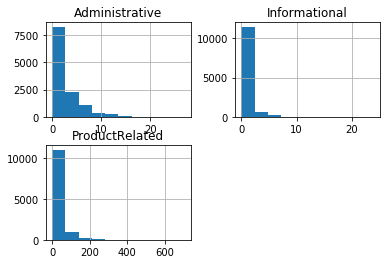

In [6]:
df[['ProductRelated', 'Informational', 'Administrative']].hist()

After looking at the stats for each column I wanted to take a closer look at the distribution of the pages columns. At this stage it would help a lot to know how each page was categorized and what pages are included in each category. For instance, is shipping and returns considered administrative or informational? What about the About Us page? Is that informational or administrative? What about blog posts are those product related or informational. Right off the bat, I would recommend that we change the data structure a bit and start tracking each page with a little more granularity. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c25ff8ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c25ff8fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c25ff8780>,
 'medians': [<matplotlib.lines.Line2D at 0x1c26007908>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c26007c50>,
 'means': []}

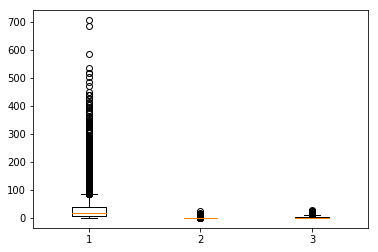

In [7]:
plt.boxplot([df.ProductRelated, df.Informational, df.Administrative])

By far, prouct related pages have far more outliers when it comes to number of visits. This is good to know, but not very useful as we care about sales and product related pages are the only ones used to make sales. For now, we will leave this as is and move on to looking further at the distribution of some of the other columns. 

In [8]:
df.rename({'OperatingSystems': 'OperatingSystem'}, axis=1, inplace=True)
df.OperatingSystem.value_counts()



2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystem, dtype: int64

In [9]:
df.Browser.value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [10]:
df.Region.value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [19]:
df.TrafficType.value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

20 traffic types is a lot, I'll have to dummify these later and if dimensionality becomes an issue, low traffic sources will be the first to go. 

Now, let's clean up some of these values a bit so they can be ready as actual names.

In [31]:
df.TrafficType = df.TrafficType.map('Type {}'.format)

In [32]:
df.Region = df.Region.map('Region {}'.format)

In [33]:
df.Browser = df.Browser.map('Browser {}'.format)

In [35]:
df.OperatingSystem = df.OperatingSystem.map('Operating System {}'.format)

In [36]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystem,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,Browser 1,Region 1,Type 1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,Browser 2,Region 1,Type 2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,Browser 1,Region 9,Type 3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,Browser 2,Region 2,Type 4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,Browser 3,Region 1,Type 4,Returning_Visitor,True,False


Now of these columns has a string value that can be encoded and understood easier for our graphs.

In [40]:
# Plot pie chart of percentage of customer visits that lead to revenue
#labels
lab = df["Revenue"].value_counts().keys().tolist()
#values
val = df["Revenue"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer Visits Resulting in Revenue",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [55]:
#Pie Chart to display percentage of visitors by type.
#labels
lab = df["VisitorType"].value_counts().keys().tolist()
#values
val = df["VisitorType"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime','red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Visitor Type Among Web Visitors",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

'Other' is a very curious type, visitors can either be new or not, let's have a  closer look here.

In [69]:
df["VisitorType"].value_counts()




Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [43]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [87]:
j = df.groupby(['VisitorType','Revenue'])['Revenue'].count()
j.Other

Revenue
False    69
True     16
Name: Revenue, dtype: int64

In [94]:
trace = go.Pie(labels = j.Other ,
               values = j.Other ,
               marker = dict(colors =  [ 'royalblue' ,'lime','red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )

layout = go.Layout(dict(title = "'Other' Visitor Type Conversions",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [105]:
trace = go.Pie(labels = j.Returning_Visitor ,
               values = j.Returning_Visitor ,
               marker = dict(colors =  [ 'royalblue' ,'lime','red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )

layout = go.Layout(dict(title = "'Returning' Visitor Type Conversions",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        ))

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [104]:
trace = go.Pie(labels = j.New_Visitor ,
               values = j.New_Visitor ,
               marker = dict(colors =  [ 'royalblue' ,'lime','red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "'New' Visitor Type Conversions",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

Those belonging to the 'Other' visitor type have 16 total revenue conversion which works out to about an 18% conversion rate which is almost right in the middle of New and Returning Visitors. With only 16 revenue conversions, I'm not going to make anything of this, but it is pretty strange. 

In [39]:
Revenue = df[df["Revenue"] == True]
Non_Revenue = df[df["Revenue"] == False]


target_col = df['Revenue'].tolist()
cat_cols   = df.loc[:, df.dtypes == object].columns.tolist()
num_cols = [x for x in df.columns if x not in cat_cols + target_col]


In [ ]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = Revenue[column].value_counts().values.tolist(),
                    labels  = Revenue[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Revenue Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = Non_Revenue[column].value_counts().values.tolist(),
                    labels  = Non_Revenue[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non Revenue customers" 
                   )


    layout = go.Layout(dict(title = column + " Distributions in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Revenue customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non Revenue customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = Revenue[column],
                          histnorm= "percent",
                          name = "Revenue Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = Non_Revenue[column],
                          histnorm = "percent",
                          name = "Non Revenue customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " Distribution Among Web Visitors ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)



In [ ]:
# from scipy import stats
# z = np.abs(stats.zscore(rem_out))


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
len(df.columns)

In [ ]:
df.Weekend.value_counts()

In [ ]:
df.Revenue.value_counts()

In [ ]:
df.Revenue = df.Revenue * 1
df.Weekend = df.Weekend * 1


In [ ]:
df.Revenue.value_counts()

## Random Forest

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn import metrics

In [ ]:
X = df.drop('Revenue', axis = 1)
y= df.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=9)

In [ ]:
# fit our model

rf = RandomForestClassifier(n_estimators=40, max_leaf_nodes=16,class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)

#make predictions
y_pred = rf.predict(X_test)





In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [8,9,10],  
               'max_features': [ 41, 45, 50, 60, 70],  
               'max_leaf_nodes':[16], 
               'class_weight':['balanced', 'balanced_subsample', None], 
               'criterion': ['entropy']},]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, 
                           cv= 10,
                           scoring='f1',
                           return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)

In [ ]:
y_pred = grid_search.predict(X_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
print("f1 Score:",f1_score(y_test, y_pred))


In [ ]:
grid_search.best_params_


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from imblearn.over_sampling import SMOTE
print(y.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [9, 10],  
               'max_features': [71, 72, 73],  
               'max_leaf_nodes':[16, 17, 18], 
               'criterion': ['gini', 'entropy']},]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, 
                           cv= 10,
                           scoring='f1',
                           return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



In [ ]:
print("f1 Score:",f1_score(y_test, y_pred))



In [ ]:
grid_search.best_params_



## Boosting!

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)




In [ ]:
y_pred = xgb_clf.predict(X_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


In [ ]:
param_grid = {"learning_rate": [0.1,0.01,.5],
              'max_depth': [10,20],
              'min_child_weight': [10],
              'subsample': [0.5],
              'n_estimators': [100, 250],}

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_clf= xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5,scoring='f1',return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)

In [ ]:
y_pred = grid_search.predict(X_test)



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



In [ ]:
f1_score(y_test, y_pred)

## Going Back to Best Performer

In [ ]:
# fit our model

rf = RandomForestClassifier(max_leaf_nodes=16,
                            class_weight=None ,
                            criterion = 'entropy', max_features =  70,
                            n_estimators = 8)
rf.fit(X_train, y_train)

#make predictions
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)


In [ ]:
# importances = rf.feature_importances_

# # creating list of column names
# feat_names=list(X_train)

# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]

# # Rearrange feature names so they match the sorted feature importances
# names = [feat_names[i] for i in indices]


feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize= (10,8))
feat_importances.nlargest(10).plot(kind='barh', title= 'Feature Importances')
plt.xlabel('Percentage Of Importance')
plt.ylabel('Features')
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

## Running Same Model Withough PageValues Feature

In [ ]:
X = df.drop(['Revenue', 'PageValues'], axis = 1)
y= df.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=9)

In [ ]:
rf = RandomForestClassifier(max_leaf_nodes=16,
                            class_weight=None ,
                            criterion = 'entropy', max_features =  70,
                            n_estimators = 8)
rf.fit(X_train, y_train)

#make predictions
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize= (10,8))
feat_importances.nlargest(10).plot(kind='barh', title= 'Feature Importances')

In [ ]:
param_grid = {"learning_rate": [.75 ,.65 ,.5],
              'max_depth': [15,20, 25],
              'min_child_weight': [5, 10, 15],
              'subsample': [0.5, .75],
              'n_estimators': [200, 250, 300]
             }

from sklearn.model_selection import GridSearchCV
xgb_clf= xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5,scoring='f1',return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)


In [ ]:
y_pred = grid_search.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
grid_search.best_params_



In [ ]:
f1_score(y_test, y_pred)



In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(learning_rate = .5, 
                            max_depth = 20, 
                            min_child_weight =10,
                            subsample = .5,
                            n_estimators = 250)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

In [ ]:
feat_importances = pd.Series(xgb_clf.feature_importances_, index=X.columns)
plt.figure(figsize= (10,8))
feat_importances.nlargest(10).plot(kind='barh', title= 'Feature Importances')

In [ ]:
f1_score(y_test, y_pred)



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [8,10, 15],  
               'max_features': [ 41, 60, 70],  
               'max_leaf_nodes':[16, 17, 18], 
               'class_weight':['balanced', None], 
               'criterion': ['entropy']},]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, 
                           cv= 10,
                           scoring='f1',
                           return_train_score=True)

#fit model with parameters from grid search
grid_search.fit(X_train, y_train)

In [ ]:
y_pred = grid_search.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)
grid_search.best_params_

In [ ]:
rf = RandomForestClassifier(max_leaf_nodes=18,
                            class_weight=None ,
                            criterion = 'entropy', max_features =  70,
                            n_estimators = 10)
rf.fit(X_train, y_train)

#make predictions
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
f1_score(y_test, y_pred)

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize= (10,8))
feat_importances.nlargest(10).plot(kind='barh', title= 'Feature Importances')

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(C=.5,kernel='rbf', class_weight='balanced')  

svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


In [ ]:
print(f"The accuracy score is {metrics.accuracy_score(y_test, y_pred)}")
print("f1 Score:",f1_score(y_test, y_pred))


In [ ]:
feat_importances = pd.Series(svclassifier.feature_importances_, index=X.columns)
plt.figure(figsize= (10,8))
feat_importances.nlargest(10).plot(kind='barh', title= 'Feature Importances')

In [ ]:
pd.Series(abs(SVC.coef_[0]), index=features.columns).nlargest(10).plot(kind='barh')
